# <center>Тема 1.6
## <center>Оглядовий аналіз даних з Pandas

### <center>Зчитування даних з csv файлу

Розглянемо найпростіший спосіб обробки даних, які зберігаються в форматі *.csv*, а також побудову елементарних графіків.

Для початку роботи імпортуємо необхідні бібліотеки.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Красиві графіки
plt.style.use('ggplot')  
# Розмір зображень
plt.rcParams['figure.figsize'] = (15, 5)

Будемо розглядати дані про велосипедистів Монреалю.
- Завантажити файл з даними: https://raw.githubusercontent.com/jvns/pandas-cookbook/master/data/bikes.csv

Цей набір даних описує, скільки людей знаходилося на 9 різних велосипедних доріжках Монреаля кожного дня.

Зчитати файл можна за допомогою методу `read_csv()`. Але в нашому випадку необхідно ще додатково задати атрибути, які зроблять наступне:

- Замінять роздільник з коми на ;
- Замінять кодування на 'latin1' (за замовчуванням ставиться 'utf8')
- Оброблять дати у стовпці 'Date'
- Вкажуть, що спочатку йде день, а потім місяць (формат YYYY-DD-MM)
- Замінять індекс на значення у стовпці 'Date'

In [15]:
fixed_df = pd.read_csv('C:/Drive/ІІС/Datasets/bikes.csv',  # тут вказуємо шлях до файлу
                       sep=';', encoding='latin1',
                       parse_dates=['Date'], dayfirst=True,
                       index_col='Date')

Переглянемо перші три записи з таблиці:

In [16]:
fixed_df[:3]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN


Щоб переглянути стовпці, можна звернутись до них, як до елементів словника. Виведемо перші 10 записів стовпця 'Maisonneuve 1'.

In [17]:
fixed_df['Maisonneuve 1'][:10]

Date
2012-01-01     38
2012-01-02     68
2012-01-03    104
2012-01-04    116
2012-01-05    124
2012-01-06     98
2012-01-07     80
2012-01-08     62
2012-01-09    165
2012-01-10    238
Name: Maisonneuve 1, dtype: int64

Тепер побудуємо графік, просто використавши метод `plot()` для всіх записів з одного стовпця.

<AxesSubplot:xlabel='Date'>

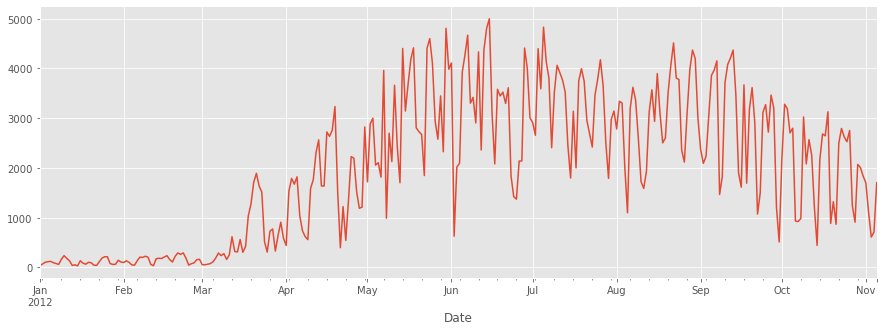

In [18]:
fixed_df['Maisonneuve 1'].plot()

Найбільш важливим етапом аналізу даних є їх **інтерпретація**. Про що нам говорить такий графік? Очевидно, що не дуже багато людей полюбляють кататися на велосипеді взимку та на початку весни :)

Також можна побудувати графік одразу для всіх стовпців. Для цього бажано трохи збільшити зображення.

<AxesSubplot:xlabel='Date'>

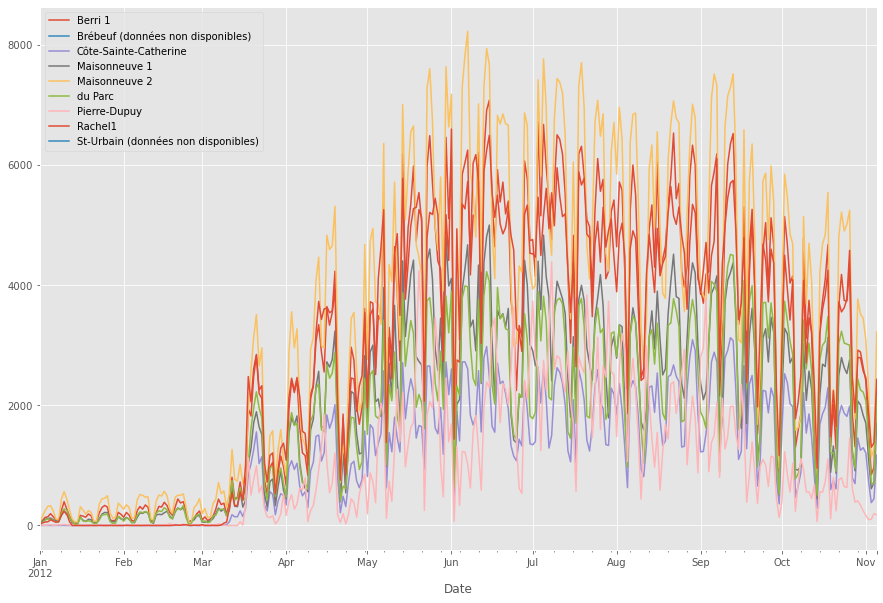

In [19]:
fixed_df.plot(figsize=(15, 10))

Що ми тут бачимо? На всіх велосипедних доріжках дані ведуть себе однаково. Якщо це поганий день для велосипедистів, то він поганий всюди.

Наступним кроком з'ясуємо, люди в Монреалі частіше використовують велосипед по буднях чи у вихідні дні? 

Як приклад, будемо розглядати доріжку Berri. Створимо для неї окремий DataFrame із використанням методу `copy()`.

In [39]:
berri_bikes = fixed_df[['Berri 1']].copy()
berri_bikes[:5]

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


Далі додамо стовпець "день тижня". Зараз в якості індексів рядків використовується дата, це не дуже зручно для нашої мети.

In [40]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)

Pandas має набір функціоналу для роботи з часовими проміжками. Тому, якщо ми хочемо отримати день місяця для кожного рядка, то можна написати:

In [41]:
berri_bikes.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            27, 28, 29, 30, 31,  1,  2,  3,  4,  5],
           dtype='int64', name='Date', length=310)

Але ми хочемо бачити день тижня, тому доповнюємо:

In [42]:
berri_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=310)

Це дні тижня, 0 - понеділок. Тепер, коли ми знаємо, як отримати день тижня, ми можемо додати його як стовпець в DataFrame.

In [46]:
berri_bikes['weekday'] = berri_bikes.index.weekday
berri_bikes[:7]

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3
2012-01-06,146,4
2012-01-07,98,5


Оскільки дні тижня будуть циклічно повторюватись, записи в таблиці необхідно згрупувати. Для цього структура DataFrame має метод `groupby()`, який групує по одному або кількох стовпцях.

У нашому випадку, `berri_bikes.groupby('weekday').sum()` означає "Згрупувати рядки за днями тижня і потім скласти всі значення з однаковим днем тижня".

In [47]:
weekday_counts = berri_bikes.groupby('weekday').sum()
weekday_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


Тепер перейменуємо 0, 1, 2, 3, 4, 5, 6, щоб розуміти, що вони означають.

In [48]:
weekday_counts.index = ['Понеділок', 'Вівторок', 'Середа', 'Четвер', "П'ятниця", 'Субота', 'Неділя']
weekday_counts

,Berri 1
Понеділок,134298
Вівторок,135305
Середа,152972
Четвер,160131
П'ятниця,141771
Субота,101578
Неділя,99310


Виведемо графік:

<AxesSubplot:>

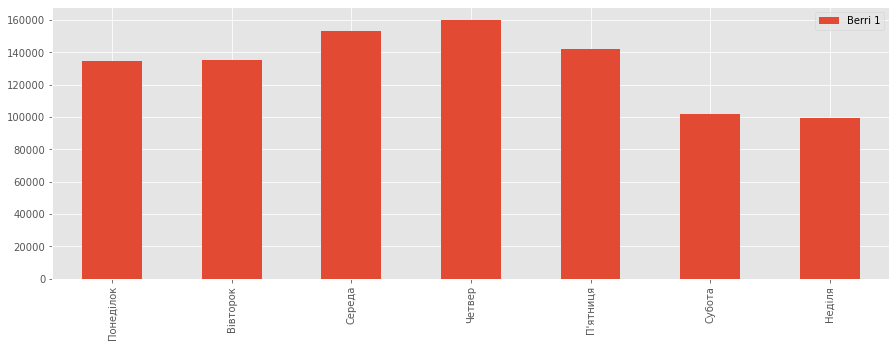

In [49]:
weekday_counts.plot(kind='bar')

Як бачимо, в Монреалі частіше їздять на велосипедах по будням.

### <center>Аналіз великого обсягу даних

Завантажимо новий набір даних, щоб навчитись працювати з великими обсягами. Це дані про запити (скарги) жителів США до соціальної служби "Сервіс 311" (аналог київської 1551).
- Заватнажити набір даних: https://raw.githubusercontent.com/jvns/pandas-cookbook/master/data/311-service-requests.csv

In [20]:
complaints = pd.read_csv('C:/Drive/ІІС/Datasets/311-service-requests.csv')

C:\Py\Anaconda3\envs\PythonGPU\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Як ми бачимо, виникло попередження. Це означає, що pandas зіткнувся з проблемою читання даних. У нашому випадку це майже точно означає, що дані мають стовпці, в яких деякі записи є рядками, а деякі являють собою цілі числа. Покуи що будемо це ігнорувати, але зазвичай в таких ситуаціях потрібно більш детально розбиратись.

Переглянемо інформацію про завантажений набір даних:

In [21]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      111069 non-null  int64  
 1   Created Date                    111069 non-null  object 
 2   Closed Date                     60270 non-null   object 
 3   Agency                          111069 non-null  object 
 4   Agency Name                     111069 non-null  object 
 5   Complaint Type                  111069 non-null  object 
 6   Descriptor                      110613 non-null  object 
 7   Location Type                   79022 non-null   object 
 8   Incident Zip                    98807 non-null   object 
 9   Incident Address                84441 non-null   object 
 10  Street Name                     84432 non-null   object 
 11  Cross Street 1                  84728 non-null   object 
 12  Cross Street 2  

Як ми бачимо, дані містять 52 колонки та 111069 записів. Якщо ми захочемо вивести цей DataFrame, то будуть показані тільки декілька перших рядків. 

Виведемо перші 5 рядків таблиці:

In [22]:
complaints[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


Переглянемо записи лише по одному із стовпців (наприклад, 'Complaint Type' - вид скарги):

In [23]:
complaints['Complaint Type'][:5]

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

До речі, порядок вказування індексів не важливий:

In [24]:
complaints[:5]['Complaint Type']

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

Тепер переглянемо лише тип скарги та район, відкинувши всі інші колонки.

In [25]:
complaints[['Complaint Type', 'Borough']]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
...,...,...
111064,Maintenance or Facility,BROOKLYN
111065,Illegal Parking,QUEENS
111066,Noise - Street/Sidewalk,MANHATTAN
111067,Noise - Commercial,BROOKLYN


Як бачимо, виводяться тільки перші і останні 5 записів.

Виведемо натомість перші 10.

In [30]:
complaints[['Complaint Type', 'Borough']][:10]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


Тепер визначимо, який тип скарг зустрічається найчастіше. Для цього у *pandas* є вбудований метод `value_counts()`.

In [31]:
complaints['Complaint Type'].value_counts()

HEATING                       14200
GENERAL CONSTRUCTION           7471
Street Light Condition         7117
DOF Literature Request         5797
PLUMBING                       5373
                              ...  
Stalled Sites                     1
Ferry Permit                      1
Municipal Parking Facility        1
Trans Fat                         1
Snow                              1
Name: Complaint Type, Length: 165, dtype: int64

Виведемо 10 найбільш частих типів скарг:

In [32]:
complaint_counts = complaints['Complaint Type'].value_counts()
complaint_counts[:10]

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint Type, dtype: int64

І для зручності побудуємо стовпчикову діаграму.

<AxesSubplot:>

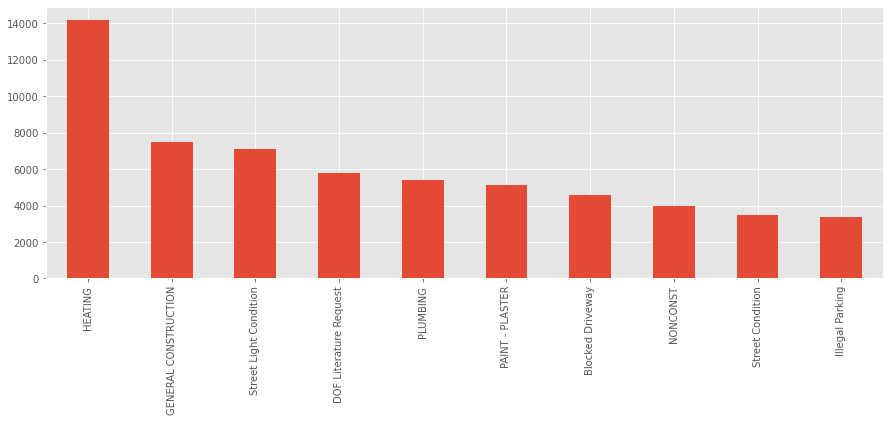

In [33]:
complaint_counts[:10].plot(kind='bar')

Як бачимо, найчастіше жителі США скаржаться на опалення :)

### <center>Об'єднання даних та операції із записами

Повернемось до велосипедистів. З'ясуємо, чи багато людей люблять кататись на велосипеді у дощ. Для цього скористаємось даними з <a href="http://climate.weather.gc.ca/index_e.html#access">архіву погоди в Канаді</a>.

Візьмемо дані за 2012 рік: http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit=Download+Data

Дані не обов'язково завантажувати на ПК. Можна автоматично відформатувати рядок стандартними методами Python, вказавши атрибути `month=3, year=2012` у відповідному методі `format()`.

Ми можемо використовувати `read_csv()` і просто вказувати URL як ім'я файлу. Також вкажемо, що будемо обробляти дати, і встановимо 'Date / Time (LST)' в якості індексів.

In [85]:
url_template = "http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit=Download+Data"
url = url_template.format(month=3, year=2012)
weather_mar2012 = pd.read_csv(url, index_col='Date/Time (LST)', parse_dates=True, encoding='latin1')

In [86]:
weather_mar2012

,"ï»¿""Longitude (x)""",Latitude (y),Station Name,Climate ID,Year,Month,Day,Time (LST),Temp (Â°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time (LST),,,,,,,,,,,,,,,,,,,,,
2012-03-01 00:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,00:00,-5.5,NaN,...,NaN,4.0,NaN,100.97,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 01:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,01:00,-5.7,NaN,...,NaN,2.4,NaN,100.87,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 02:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,02:00,-5.4,NaN,...,NaN,4.8,NaN,100.80,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 03:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,03:00,-4.7,NaN,...,NaN,4.0,NaN,100.69,NaN,NaN,NaN,-12.0,NaN,Snow
2012-03-01 04:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,04:00,-5.4,NaN,...,NaN,1.6,NaN,100.62,NaN,NaN,NaN,-14.0,NaN,Snow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-03-31 19:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,31,19:00,5.9,NaN,...,NaN,25.0,NaN,100.88,NaN,NaN,NaN,NaN,NaN,Clear
2012-03-31 20:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,31,20:00,4.4,NaN,...,NaN,25.0,NaN,100.85,NaN,NaN,NaN,NaN,NaN,Clear
2012-03-31 21:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,31,21:00,2.6,NaN,...,NaN,25.0,NaN,100.86,NaN,NaN,NaN,NaN,NaN,Clear


Побудуємо графік температури.

<AxesSubplot:xlabel='Date/Time (LST)'>

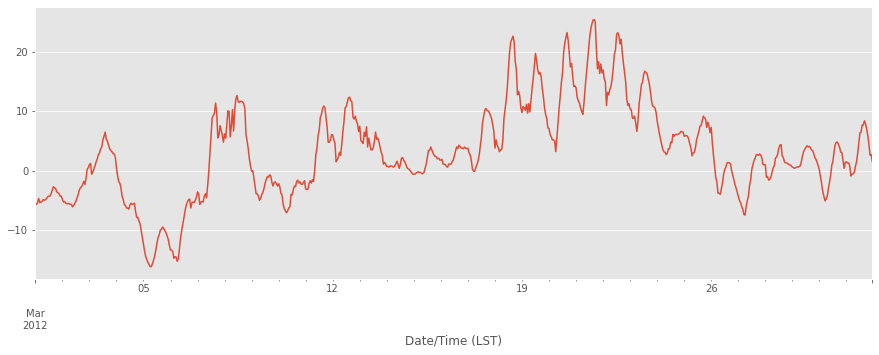

In [87]:
weather_mar2012["Temp (Â°C)"].plot(figsize=(15, 5))

Назви стовпців можна змінити для зручності (наприклад, "Temp (Â°C)" - не дуже зручно).

In [88]:
weather_mar2012.columns = [u'Longitude', u'Latitude', u'Station', u'Climate ID',
    u'Year', u'Month', u'Day', u'Time', u'Temp (C)', 
    u'Temp Flag', u'Dew Point Temp (C)', u'Dew Point Temp Flag', 
    u'Rel Hum (%)', u'Rel Hum Flag',u'Precip. Amount (mm)', u'Precip. Amount Flag', u'Wind Dir (10s deg)', u'Wind Dir Flag', 
    u'Wind Spd (km/h)', u'Wind Spd Flag', u'Visibility (km)', u'Visibility Flag',
    u'Stn Press (kPa)', u'Stn Press Flag', u'Hmdx', u'Hmdx Flag', u'Wind Chill', 
    u'Wind Chill Flag', u'Weather']

Є багато стовпців, які майже повністю порожні. Видалимо їх за допомогою методу `dropna()`.

Аргумент `axis = 1` у `dropna()` означає "видалити стовпці, а не рядки", і `how = 'any'` означає "видалити стовпець, якщо хоча б одне значення порожнє".

In [89]:
weather_mar2012 = weather_mar2012.dropna(axis=1, how='any')
weather_mar2012[:5]

,Longitude,Latitude,Station,Climate ID,Year,Month,Day,Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time (LST),,,,,,,,,,,,,,,
2012-03-01 00:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,00:00,-5.5,-9.7,72,24,4.0,100.97,Snow
2012-03-01 01:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,01:00,-5.7,-8.7,79,26,2.4,100.87,Snow
2012-03-01 02:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,02:00,-5.4,-8.3,80,28,4.8,100.80,Snow
2012-03-01 03:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,03:00,-4.7,-7.7,79,28,4.0,100.69,Snow
2012-03-01 04:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,2012,3,1,04:00,-5.4,-7.8,83,35,1.6,100.62,Snow


Стовпці  Longitude / Latitude / Station / Climate ID / Year / Month / Day / Time  для нашої задачі зайві. Видалимо їх за допомогою методу `drop()`.

In [90]:
weather_mar2012 = weather_mar2012.drop(weather_mar2012.iloc[:, 0:8], axis=1)
weather_mar2012[:5]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time (LST),,,,,,,
2012-03-01 00:00:00,-5.5,-9.7,72,24,4.0,100.97,Snow
2012-03-01 01:00:00,-5.7,-8.7,79,26,2.4,100.87,Snow
2012-03-01 02:00:00,-5.4,-8.3,80,28,4.8,100.80,Snow
2012-03-01 03:00:00,-4.7,-7.7,79,28,4.0,100.69,Snow
2012-03-01 04:00:00,-5.4,-7.8,83,35,1.6,100.62,Snow


Побудуємо графік температури. Для цього згрупуємо дані за часом доби, який "витягнемо" з індексів (так само, як ми робили для велосипедистів за днями тижня). Тільки рахувати будемо не сумк, а медіану.

<AxesSubplot:xlabel='Hour'>

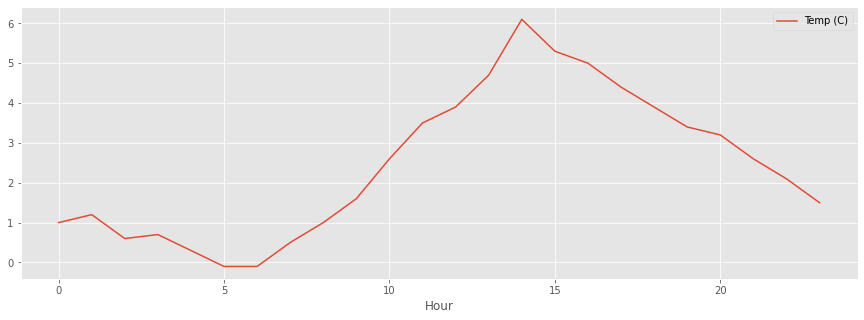

In [92]:
import numpy as np

temperatures = weather_mar2012[[u'Temp (C)']].copy()
temperatures.loc[:,'Hour'] = weather_mar2012.index.hour
temperatures.groupby('Hour').aggregate(np.median).plot()

Як бачимо, найвища температура за медіаною припадає на 14:00.

Дані за місяць ми навчились обробляти. А як отримати дані за рік?

Для цього можемо створити функцію - парсер:

In [122]:
def download_weather_month(year, month):
    url = url_template.format(year=year, month=month)
    weather_data = pd.read_csv(url, index_col='Date/Time (LST)', parse_dates=True, encoding='latin1')
    weather_data.columns = [u'Longitude', u'Latitude', u'Station', u'Climate ID',
    u'Year', u'Month', u'Day', u'Time', u'Temp (C)', 
    u'Temp Flag', u'Dew Point Temp (C)', u'Dew Point Temp Flag', 
    u'Rel Hum (%)', u'Rel Hum Flag',u'Precip. Amount (mm)', u'Precip. Amount Flag', u'Wind Dir (10s deg)', u'Wind Dir Flag', 
    u'Wind Spd (km/h)', u'Wind Spd Flag', u'Visibility (km)', u'Visibility Flag',
    u'Stn Press (kPa)', u'Stn Press Flag', u'Hmdx', u'Hmdx Flag', u'Wind Chill', 
    u'Wind Chill Flag', u'Weather']
    weather_data = weather_data.dropna(axis=1)
    weather_data = weather_data.drop(weather_data.iloc[:, 0:8], axis=1)
    return weather_data

Перевіримо:

In [123]:
download_weather_month(2012, 1)[:5]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time (LST),,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


Згенеруємо список з DataFrame для кожного місяця:

In [124]:
data_by_month = [download_weather_month(2012, i) for i in range(1, 13)]

І об'єднаємо все в один DataFrame.

In [125]:
weather_2012 = pd.concat(data_by_month)
weather_2012

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time (LST),,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...
2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow


Ми отримали дані за весь рік. 

Для того, щоб кожного разу не парсити дані, збережемо їх у форматі csv.

In [126]:
weather_2012.to_csv('C:/Drive/ІІС/Datasets/weather_2012.csv')

І наостанок, знайдемо найбільш сніжний місяць.

Для початку імпортуємо щойно створений набір даних, щоб перевірити його правильність.

In [127]:
weather_2012 = pd.read_csv('C:/Drive/ІІС/Datasets/weather_2012.csv', parse_dates=True, index_col='Date/Time (LST)')
weather_2012[:5]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time (LST),,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


Ми бачимо, що стовпець 'Weather' містить текстовий опис погоди за годину. Припустимо, що сніжна погода в описі містить "Snow".

Pandas дозволяє здійснювати операції над рядковими даними, дозволяючи ефективно обробляти стовпці.

In [128]:
weather_description = weather_2012['Weather']
is_snowing = weather_description.str.contains('Snow')

Цей код повертає булевий вектор.

In [129]:
is_snowing[:5]

Date/Time (LST)
2012-01-01 00:00:00    False
2012-01-01 01:00:00    False
2012-01-01 02:00:00    False
2012-01-01 03:00:00    False
2012-01-01 04:00:00    False
Name: Weather, dtype: bool

Для аналізу вектора зручніше побудувати графік, перетворивши дані на float.

In [141]:
is_snowing = is_snowing.astype(int)

<AxesSubplot:xlabel='Date/Time (LST)'>

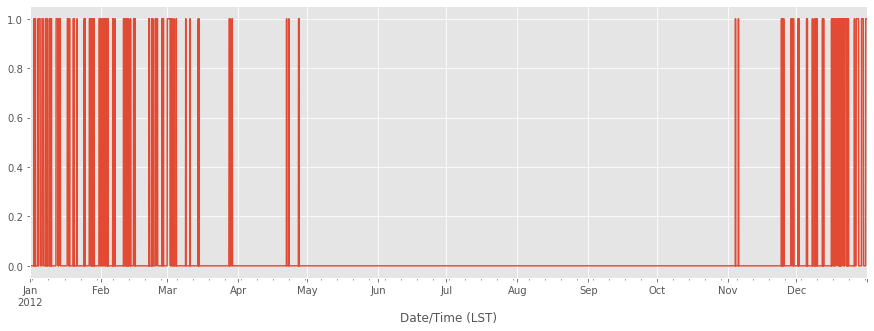

In [142]:
is_snowing.plot()

Можна побудувати графік медіанної температури за кожен місяць. Для цього потрібно використати метод `resample()`. Параметр *'M'* вказує, що ми беремо дані за кожен місяць.

<AxesSubplot:xlabel='Date/Time (LST)'>

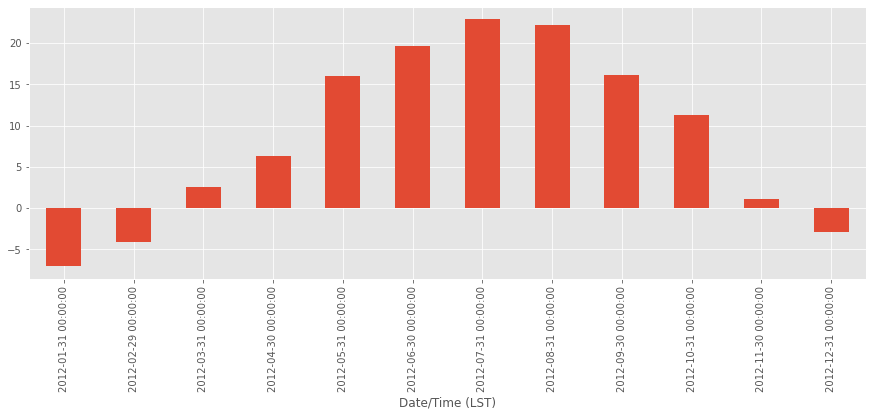

In [136]:
weather_2012['Temp (C)'].resample('M').median().plot(kind='bar')

Бачимо, що липень та серпень виявились найбільш теплими місяцями (хто б міг подумати).

Стосовно снігу, можна вважати, що ми маємо справу з векторами з нулів і одиниць, замість True і False:

In [134]:
is_snowing.astype(int)[:5]

Date/Time (LST)
2012-01-01 00:00:00    0
2012-01-01 01:00:00    0
2012-01-01 02:00:00    0
2012-01-01 03:00:00    0
2012-01-01 04:00:00    0
Name: Weather, dtype: int32

А потім використовувати `resample()`, щоб знайти відсоток часу, коли йшов сніг.

In [135]:
is_snowing.astype(int).resample('M').mean()

Date/Time (LST)
2012-01-31    0.240591
2012-02-29    0.162356
2012-03-31    0.087366
2012-04-30    0.015278
2012-05-31    0.000000
2012-06-30    0.000000
2012-07-31    0.000000
2012-08-31    0.000000
2012-09-30    0.000000
2012-10-31    0.000000
2012-11-30    0.038889
2012-12-31    0.251344
Freq: M, Name: Weather, dtype: float64

<AxesSubplot:xlabel='Date/Time (LST)'>

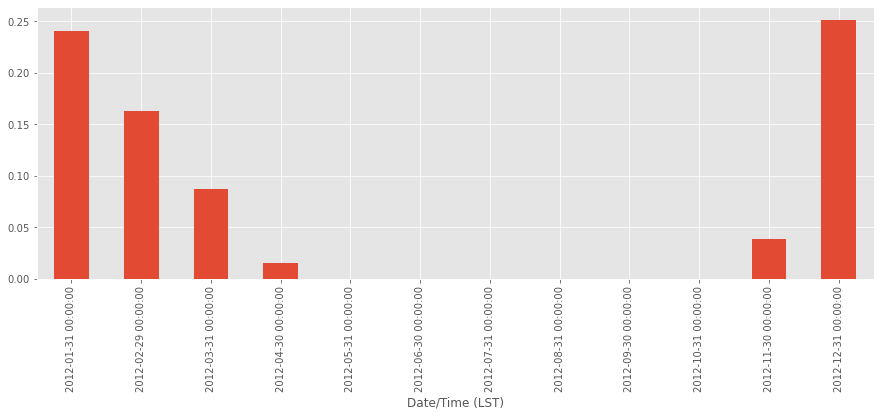

In [137]:
is_snowing.astype(int).resample('M').mean().plot(kind='bar')

Поглянувши на графік робимо висновок, що найбільш часто сніг йшов у грудні.

Тепер об'єднаємо це зі статистикою по температурі в один DataFrame та побудуємо суміщений графік.

In [138]:
temperature = weather_2012['Temp (C)'].resample('M').median()
is_snowing = weather_2012['Weather'].str.contains('Snow')
snowiness = is_snowing.astype(int).resample('M').mean()

temperature.name = "Температура"
snowiness.name = "Сніжність"

stats = pd.concat([temperature, snowiness], axis=1)
stats

,Температура,Сніжність
Date/Time (LST),,
2012-01-31,-7.05,0.240591
2012-02-29,-4.10,0.162356
2012-03-31,2.60,0.087366
2012-04-30,6.30,0.015278
2012-05-31,16.05,0.000000
2012-06-30,19.60,0.000000
2012-07-31,22.90,0.000000
2012-08-31,22.20,0.000000
2012-09-30,16.10,0.000000


<AxesSubplot:xlabel='Date/Time (LST)'>

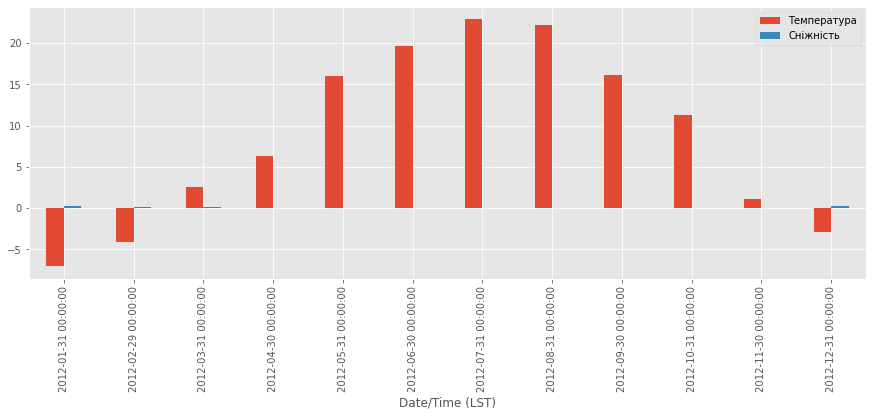

In [139]:
stats.plot(kind='bar')

Бачимо, що масштаби не співпадають. Тому краще зробити на двох окремих графіках:

array([<AxesSubplot:title={'center':'Температура'}, xlabel='Date/Time (LST)'>,
       <AxesSubplot:title={'center':'Сніжність'}, xlabel='Date/Time (LST)'>],
      dtype=object)

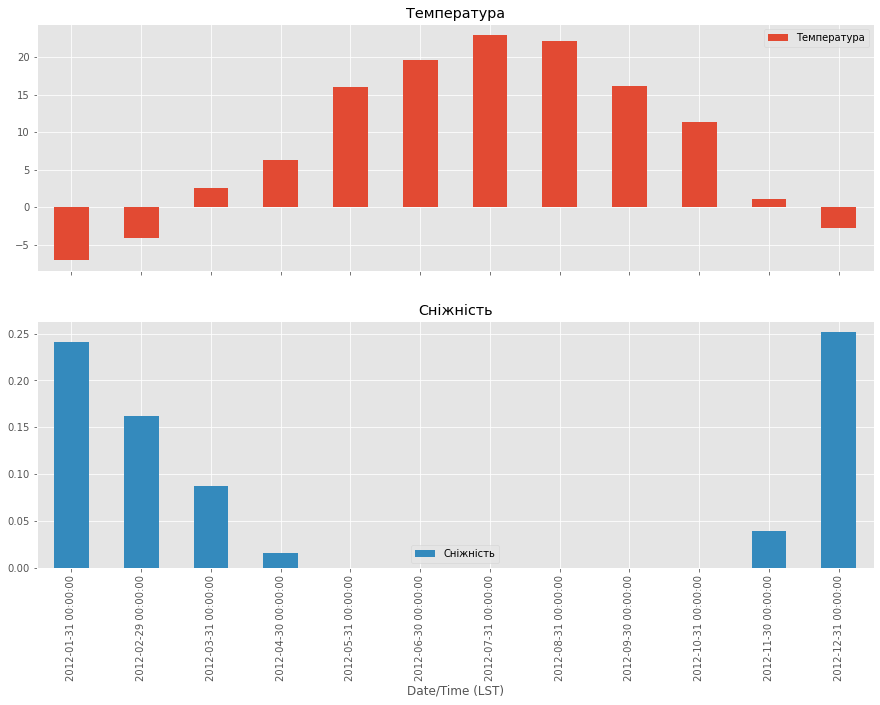

In [140]:
stats.plot(kind='bar', subplots=True, figsize=(15, 10))